In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam 

In [25]:
data=datasets.load_digits()

x_data=data.images
y_data=data.target

x_data=x_data.reshape((x_data.shape[0],x_data.shape[1],x_data.shape[2], 1))
y_data=to_categorical(y_data)

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=777)

In [26]:
model = Sequential()

model.add(Conv2D(input_shape = (x_data.shape[1],x_data.shape[2],x_data.shape[3]),filters=10,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(50,activation ='relu'))
model.add(Dense(10, activation ='softmax'))

In [27]:
adam=Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

history=model.fit(x_train,y_train,batch_size=50,validation_split=0.2,epochs=100,verbose=1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


21/21 [==============================] - 1s 11ms/step - loss: 4.7937 - accuracy: 0.1682 - val_loss: 2.6838 - val_accuracy: 0.1984
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 2.0469 - accuracy: 0.3204 - val_loss: 1.5493 - val_accuracy: 0.4881
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 1.3276 - accuracy: 0.5662 - val_loss: 1.0191 - val_accuracy: 0.6905
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.8842 - accuracy: 0.7522 - val_loss: 0.6656 - val_accuracy: 0.8492
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6052 - accuracy: 0.8418 - val_loss: 0.4505 - val_accuracy: 0.9008
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 0.4492 - accuracy: 0.8905 - val_loss: 0.3645 - val_accuracy: 0.9127
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3360 - accuracy: 0.9174 - val_loss: 0.3011 - val_accuracy: 0.9286
Epoch 8/100
21/21 [=====

In [28]:
results=model.evaluate(x_test,y_test)
print('Test accuracy:',results[1])

17/17 [==============================] - 0s 2ms/step - loss: 0.0714 - accuracy: 0.9722
Test accuracy: 0.9722222089767456


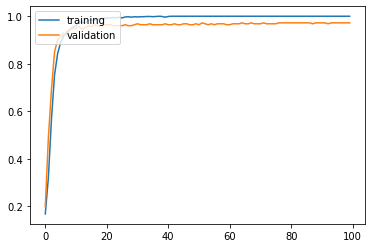

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'],loc ='upper left')
plt.show()
